-----------------------------------------


Copyright 2016 Allen Downey

MIT License: http://opensource.org/licenses/MIT

In [1]:
from __future__ import print_function, division

import thinkbayes2
import thinkplot

import numpy as np
from scipy import stats

%matplotlib inline

Here's an update that takes the prior probability of being sick `prior`=$x$, and the likelihoods of the data, `prob_given_sick`=$P(fever|sick)$ and `prob_given_not` =$P(fever|not sick)$

In [2]:
def update(prior, prob_given_sick, prob_given_not):
    suite = thinkbayes2.Suite()
    suite['sick'] = prior * prob_given_sick
    suite['not sick'] = (1-prior) * prob_given_not
    suite.Normalize()
    return suite['sick']

If we start with $x=0.1$ and update with the assumption that fever is more likely if you're sick, the posterior goes up to $x\prime = 0.25$

In [3]:
prior = 0.1
prob_given_sick = 0.9
prob_given_not = 0.3

post = update(prior, prob_given_sick, prob_given_not)
post

0.24999999999999997

Now suppose we don't know $s =$ `prob_given_sick`=$P(fever|sick)$ and $t = $ `prob_given_not` =$P(fever|not sick)$, but we think they are uniformly distributed and independent.

In [4]:
dist_s = thinkbayes2.Beta(1, 1)
dist_t = thinkbayes2.Beta(1, 1)
dist_s.Mean(), dist_t.Mean()

(0.5, 0.5)

We can compute the distribute of $x\prime$ by drawing samples from the distributions of $s$ and $t$ and computing the posterior for each.

In [5]:
n = 1000
ss = dist_s.Sample(n)
ts = dist_t.Sample(n)

Just checking that the samples have the right distributions:

{'xscale': 'linear', 'yscale': 'linear'}

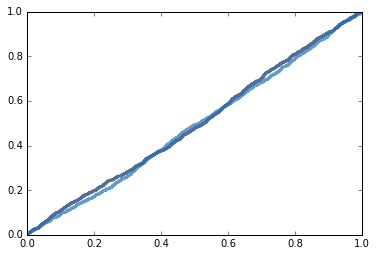

In [6]:
thinkplot.Cdf(thinkbayes2.Cdf(ss))
thinkplot.Cdf(thinkbayes2.Cdf(ts))

Now computing the posteriors:

In [7]:
posts = [update(prior, s, t) for s, t in zip(ss, ts)]

Here's what the distribution of values for $x\prime$ looks like:

{'xscale': 'linear', 'yscale': 'linear'}

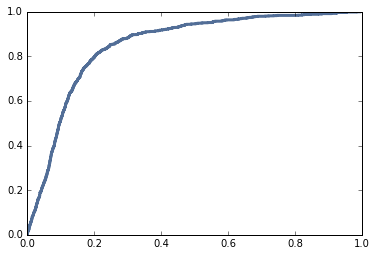

In [8]:
cdf = thinkbayes2.Cdf(posts)
thinkplot.Cdf(cdf)

And here's the mean:

In [9]:
cdf.Mean()

0.14984230914942298

This result implies that if our prior probability for $x$ is 0.1, and then we learn that the patient has a fever, we should be uncertain about $x\prime$, and this distribution describes that uncertainty.  It says that the fever probably has little predictive power, but might have quite a lot.

The mean of this distribution is a little higher than the prior, which suggests that our priors for $s$ and $t$ are not neutral with respect to updating $x$.  It's surprising that the effect is not symmetric, because our beliefs about $s$ and $t$ are symmetric.  But then again, we just computed an arithmetic mean on a set of probabilities, which is a bogus kind of thing to do.  So maybe we deserve what we got.

Just for fun, what would we have to believe about $s$ and $t$ to make them neutral with respect to the posterior mean of $x$?

{'xscale': 'linear', 'yscale': 'linear'}

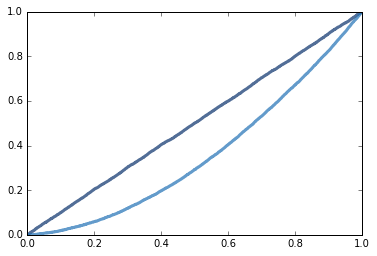

In [10]:
dist_s = thinkbayes2.Beta(1, 1)
dist_t = thinkbayes2.Beta(1.75, 1)
n = 10000
ss = dist_s.Sample(n)
ts = dist_t.Sample(n)
thinkplot.Cdf(thinkbayes2.Cdf(ss))
thinkplot.Cdf(thinkbayes2.Cdf(ts))

In [11]:
posts = [update(prior, s, t) for s, t in zip(ss, ts)]
np.array(posts).mean()

0.097254059193131168